In [118]:
!git init <tSNE_analysis tSNE_analysis/>

/bin/sh: 1: Syntax error: end of file unexpected


In [ ]:
import convolve 

In [1]:
################# imports  ################
from os import listdir
from os.path import isfile, join
import pandas as pd

from io import StringIO
from io import BytesIO
#from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy.table import Table, join, hstack,vstack,QTable
from astropy.table import Table
from esutil import htm
import numpy as np
import pandas as pd
import os #biblioteca para manipular arquivos e pastas
from os import listdir
from os.path import isfile, join
import healpy as hp


In [2]:
################# Match ################

def match(cat_1, cat_2, column_1, column_2, column_3, column_4,error):
    'Function to make the matching with two tables, using the esutil'
    h = htm.HTM(depth=10)
    m1, m2, d12 = h.match(np.array(cat_1[column_1]), 
                          np.array(cat_1[column_3]),
                          np.array(cat_2[column_2]), 
                          np.array(cat_2[column_4]),
                          error, maxmatch=1)
    
    submatched = cat_1[m1]
    manmatched = cat_2[m2]
    matched = hstack([submatched, manmatched])
      
    return matched

# Carregamento dos dados 

## DES

In [3]:
################# lê e concatena todas as tabelas que tem no diretório indicado ################
diretorio = '/media/new-drive/CamilaCardoso/DES/'
table_list = []
for diretorio, subpastas, arquivos in os.walk(diretorio):
    for arquivo in arquivos:
        df = Table.read(os.path.join(diretorio, arquivo)).to_pandas()
        table_list.append(df)
        print(os.path.join(diretorio, arquivo))
des_data = pd.concat(table_list, axis=0, ignore_index=True)

/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_0_1000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_1000_2000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_2000_3000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_3000_4000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_4000_5000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_5000_6000.fits
/media/new-drive/CamilaCardoso/DES/DES_DR2_interval_6000_6568.fits


## Sloan

In [4]:
diretorio = '/media/new-drive/CamilaCardoso/SLOAN'
arquivo = 'SLOAN_DR16_sloan_data_quasar_all.fits'
sloan_data_dr16 = Table.read(os.path.join(diretorio, arquivo))

In [8]:
'''
diretorio = 'SLOAN/'

# para verificar os arquivos contidos no diretório descomente essa secção 
for diretorio, subpastas, arquivos in os.walk(diretorio):
    for arquivo in arquivos:
        print(os.path.join(diretorio, arquivo))
'''

SLOAN/SLOAN_DR16_sloan_data_all.fits
SLOAN/SLOAN_DR16_sloan_data_all.zip


In [4]:
diretorio = 'SLOAN/'
arquivo = 'SLOAN_DR16_sloan_data_all.fits'
sloan_data_dr16 = Table.read(os.path.join(diretorio, arquivo))

In [5]:
################# Match ################

# Conjunto de dados 02
des_data_table = Table.from_pandas(des_data)

# Conjunto de dados 01
match_des_sloan = match(sloan_data_dr16,des_data_table,'ra','RA','dec','DEC',0.0002)
# 1 segundo de arco = 0.0002778 graus

In [6]:
match_des_sloan = match_des_sloan.to_pandas()
#converte a coluna class de bits à string
match_des_sloan['class'] = match_des_sloan['class'].str.decode("utf-8")

In [117]:
len(match_des_sloan)

177670

In [7]:
match_qso = match_des_sloan[match_des_sloan['class'] == 'QSO']
match_star = match_des_sloan[match_des_sloan['class'] == 'STAR']
match_galaxy = match_des_sloan[match_des_sloan['class'] == 'GALAXY']

In [8]:
#Agrupa todas os objetos por Npix e conta as quantidades
groupy_npix = match_qso.groupby(['Npix']).size().reset_index(name='counts')
#ordena todos os valores com base na coluna counts em ordem decrescente 
groupy_npix_ordenado = groupy_npix.sort_values(by='counts',ascending=False)
# Reinicia a contagem do index
groupy_npix_ordenado = groupy_npix_ordenado.reset_index()
#seleciona 20% dos pixels mais populados de quasares
vinte_porcento_qsos = groupy_npix_ordenado.loc[0:(len(groupy_npix_ordenado)//5)-1]

In [9]:
#Agrupa todas os objetos por Npix e conta as quantidades
groupy_npix = match_star.groupby(['Npix']).size().reset_index(name='counts')
#ordena todos os valores com base na coluna counts em ordem decrescente 
groupy_npix_ordenado = groupy_npix.sort_values(by='counts',ascending=False)
# Reinicia a contagem do index
groupy_npix_ordenado = groupy_npix_ordenado.reset_index()
#seleciona 20% dos pixels mais populados de quasares
vinte_porcento_stars = groupy_npix_ordenado.loc[0:(len(groupy_npix_ordenado)//5)-1]

In [10]:
#Agrupa todas os objetos por Npix e conta as quantidades
groupy_npix = match_galaxy.groupby(['Npix']).size().reset_index(name='counts')
#ordena todos os valores com base na coluna counts em ordem decrescente 
groupy_npix_ordenado = groupy_npix.sort_values(by='counts',ascending=False)
# Reinicia a contagem do index
groupy_npix_ordenado = groupy_npix_ordenado.reset_index()
#seleciona 20% dos pixels mais populados de quasares
vinte_porcento_galaxy = groupy_npix_ordenado.loc[0:(len(groupy_npix_ordenado)//5)-1]

In [11]:
frames = [vinte_porcento_qsos, vinte_porcento_stars, vinte_porcento_galaxy]
result = pd.concat(frames)

In [12]:
result.drop(['index', 'counts'], axis=1, inplace=True)

In [15]:
Npix_uniques = result['Npix'].unique()
result = pd.DataFrame()
result['Npix'] = Npix_uniques

In [ ]:
################ Sampling per Npix ##############
#50% dos Npix para treinamento e o restante para teste
# getting the trainning sample
npix_sample_50_training = result.sample(frac=0.5)
#getting the testing sample
npix_sample_50_testing = pd.merge(result,npix_sample_50_training,on=['Npix'],how="outer",indicator=True)
npix_sample_50_testing = npix_sample_50_testing[npix_sample_50_testing['_merge']=='left_only']
#exclud the colunm _merge of the testing sample DF
npix_sample_50_testing.drop(['_merge'], axis=1, inplace=True)

In [36]:
npix_sample_50_training_objects = pd.merge(npix_sample_50_training, match_des_sloan, on = ['Npix'])
npix_sample_50_testing_objects = pd.merge(npix_sample_50_testing, match_des_sloan, on = ['Npix'])

In [116]:
path = 'SAMPLES/'
npix_sample_50_training_table = Table.from_pandas(npix_sample_50_training_objects)
npix_sample_50_training_table.write(path + 'sample_per_npix_50_training.fits') 
npix_sample_50_testing_table = Table.from_pandas(npix_sample_50_testing_objects)
npix_sample_50_testing_table.write(path + 'sample_per_npix_50_test.fits')

In [114]:
npix_sample_50_training_objects

,Npix,specObjID,survey,instrument,class,ra,dec,z,zErr,COADD_OBJECT_ID,...,CLASS_STAR_Y,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MAG_AUTO_Z,MAG_AUTO_Y,COLOR_g-r,COLOR_r-i,COLOR_i-z,COLOR_z-Y
0,23944,2.145007e+18,b'segue1',b'SDSS',STAR,11.974065,1.079041,-0.000295,0.000013,1102222798,...,0.911245,18.893343,18.203394,17.949255,17.816441,17.812716,0.689949,0.254139,0.132814,0.003725
1,23944,2.145008e+18,b'segue1',b'SDSS',STAR,12.125035,0.874738,-0.000663,0.000033,1102374114,...,0.978287,19.313513,19.098911,19.063242,19.081818,19.204943,0.214602,0.035669,-0.018576,-0.123125
2,23944,2.145008e+18,b'segue1',b'SDSS',STAR,12.025144,1.016122,-0.000070,0.000009,1102229568,...,0.784286,19.439207,18.140406,17.540852,17.244879,17.190096,1.298801,0.599554,0.295973,0.054783
3,23944,2.145009e+18,b'segue1',b'SDSS',STAR,11.923653,0.644142,0.000162,0.000018,1102397340,...,0.900581,20.156950,19.549812,19.361361,19.256697,19.234097,0.607138,0.188452,0.104664,0.022600
4,23944,2.145009e+18,b'segue1',b'SDSS',STAR,12.020496,0.891423,-0.000291,0.000022,1102372399,...,0.920581,19.455637,19.082058,18.989418,18.955397,19.014387,0.373579,0.092640,0.034021,-0.058990
5,23944,2.143871e+18,b'segue1',b'SDSS',STAR,11.369587,1.146303,-0.000124,0.000008,1098000325,...,0.989095,18.240791,17.346661,17.079672,16.931316,16.902534,0.894131,0.266989,0.148355,0.028782
6,23944,2.143872e+18,b'segue1',b'SDSS',STAR,11.456181,1.074450,-0.000179,0.000009,1096860169,...,0.949466,17.251062,16.031479,15.737412,15.464228,15.334513,1.219584,0.294066,0.273185,0.129715
7,23944,2.143872e+18,b'segue1',b'SDSS',STAR,11.432714,1.091635,-0.000160,0.000017,1098006285,...,0.894295,19.119015,17.809843,17.077478,16.713842,16.649544,1.309172,0.732365,0.363636,0.064299
8,23944,2.143873e+18,b'segue1',b'SDSS',STAR,11.655630,0.877046,-0.000023,0.000009,1096881714,...,0.965476,18.842793,17.661018,17.250164,17.033222,16.989986,1.181774,0.410854,0.216942,0.043236
9,23944,2.143879e+18,b'segue1',b'SDSS',STAR,11.839757,1.033628,0.000024,0.000008,1102227365,...,0.941536,16.691038,15.721690,15.706177,15.437498,15.233831,0.969348,0.015513,0.268679,0.203667


In [38]:
npix_sample_50_training_objects.groupby(['class']).count() 

,Npix,specObjID,survey,instrument,ra,dec,z,zErr,COADD_OBJECT_ID,RA,...,CLASS_STAR_Y,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MAG_AUTO_Z,MAG_AUTO_Y,COLOR_g-r,COLOR_r-i,COLOR_i-z,COLOR_z-Y
class,,,,,,,,,,,,,,,,,,,,,
GALAXY,1684,1684,1684,1684,1684,1684,1684,1684,1684,1684,...,1684,1684,1684,1684,1684,1684,1684,1684,1684,1684
QSO,18629,18629,18629,18629,18629,18629,18629,18629,18629,18629,...,18629,18629,18629,18629,18629,18629,18629,18629,18629,18629
STAR,30610,30610,30610,30610,30610,30610,30610,30610,30610,30610,...,30610,30610,30610,30610,30610,30610,30610,30610,30610,30610


In [39]:
npix_sample_50_testing_objects.groupby(['class']).count() 

,Npix,specObjID,survey,instrument,ra,dec,z,zErr,COADD_OBJECT_ID,RA,...,CLASS_STAR_Y,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MAG_AUTO_Z,MAG_AUTO_Y,COLOR_g-r,COLOR_r-i,COLOR_i-z,COLOR_z-Y
class,,,,,,,,,,,,,,,,,,,,,
GALAXY,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516,...,1516,1516,1516,1516,1516,1516,1516,1516,1516,1516
QSO,18251,18251,18251,18251,18251,18251,18251,18251,18251,18251,...,18251,18251,18251,18251,18251,18251,18251,18251,18251,18251
STAR,33073,33073,33073,33073,33073,33073,33073,33073,33073,33073,...,33073,33073,33073,33073,33073,33073,33073,33073,33073,33073


In [17]:
################ Sampling per Objects ##############
#junta o df os 20% com maior número de quasares, galáxias e 
sample_completa = pd.merge(result, match_des_sloan, on = ['Npix'])
sample_50_treinamento = sample_completa.sample(frac=0.5)
sample_50_teste = pd.merge(sample_completa,sample_50_treinamento,on=['specObjID'],how="outer",indicator=True)
sample_50_teste = sample_50_teste[sample_50_teste['_merge']=='left_only']

In [41]:
path = 'SAMPLES/'
sample_50_treinamento_table = Table.from_pandas(sample_50_treinamento)
sample_50_treinamento_table.write(path + 'sample_per_unit_50_training.fits') 
sample_50_teste_table = Table.from_pandas(sample_50_teste)
sample_50_teste_table.write(path + 'sample_per_unit_50_test.fits') 

In [28]:
sample_50_teste.groupby(['class_x']).count() 

,Npix_x,specObjID,survey_x,instrument_x,ra_x,dec_x,z_x,zErr_x,COADD_OBJECT_ID_x,RA_x,...,MAG_AUTO_G_y,MAG_AUTO_R_y,MAG_AUTO_I_y,MAG_AUTO_Z_y,MAG_AUTO_Y_y,COLOR_g-r_y,COLOR_r-i_y,COLOR_i-z_y,COLOR_z-Y_y,_merge
class_x,,,,,,,,,,,,,,,,,,,,,
GALAXY,1633,1633,1633,1633,1633,1633,1633,1633,1633,1633,...,0,0,0,0,0,0,0,0,0,1633
QSO,18419,18419,18419,18419,18419,18419,18419,18419,18419,18419,...,0,0,0,0,0,0,0,0,0,18419
STAR,31829,31829,31829,31829,31829,31829,31829,31829,31829,31829,...,0,0,0,0,0,0,0,0,0,31829


In [26]:
sample_50_treinamento.groupby(['class']).count() 

,Npix,specObjID,survey,instrument,ra,dec,z,zErr,COADD_OBJECT_ID,RA,...,CLASS_STAR_Y,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,MAG_AUTO_Z,MAG_AUTO_Y,COLOR_g-r,COLOR_r-i,COLOR_i-z,COLOR_z-Y
class,,,,,,,,,,,,,,,,,,,,,
GALAXY,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,...,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567
QSO,18461,18461,18461,18461,18461,18461,18461,18461,18461,18461,...,18461,18461,18461,18461,18461,18461,18461,18461,18461,18461
STAR,31854,31854,31854,31854,31854,31854,31854,31854,31854,31854,...,31854,31854,31854,31854,31854,31854,31854,31854,31854,31854


In [6]:
diretorio = ''
nome_arquivo = ''
match_des_sloan.write('/media/new-drive/CamilaCardoso/CROSS_MATCH_SLOAN_DR16_DES_20211029.fits')

## Plot

In [43]:
Nside = 64
Npix = hp.nside2npix(Nside) # Definição de Npix - 12*(Nside)**2

# Criando um dataframe para a plotagem do mollview 
pixels_location = pd.DataFrame()
pixels_location['indices'] = np.arange(Npix)

In [44]:
match_pixels_location = pd.DataFrame()
match_pixels_location['indices'] = match_des_sloan['Npix']
match_pixels_grouped = match_pixels_location.groupby(['indices']).size().reset_index(name='counts')

match_pixels_frequency = pd.merge(pixels_location, match_pixels_grouped, how = 'outer')
match_pixels_frequency = match_pixels_frequency.fillna(0) 

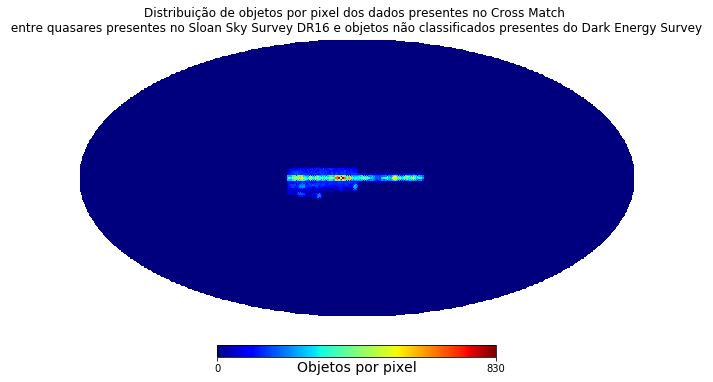

In [94]:
match_pixels_location = pd.DataFrame()
match_pixels_location['indices'] = match_des_sloan['Npix']
match_pixels_grouped = match_pixels_location.groupby(['indices']).size().reset_index(name='counts')

match_pixels_frequency = pd.merge(pixels_location, match_pixels_grouped, how = 'outer')
match_pixels_frequency = match_pixels_frequency.fillna(0) 

plt.figure(figsize=(10,10))
hp.mollview(match_pixels_frequency.counts.values, title="Distribuição de objetos por pixel dos dados presentes no Cross Match \n entre quasares presentes no Sloan Sky Survey DR16 e objetos não classificados presentes do Dark Energy Survey ", unit='Objetos por pixel', cmap='jet', hold =True )
plt.show()

<Figure size 720x720 with 0 Axes>

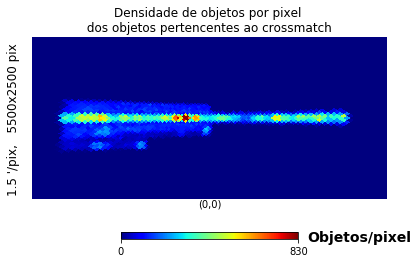

In [110]:
plt.figure(figsize=(10,10))
hp.visufunc.gnomview(map=match_pixels_frequency.counts.values,
                     fig=None, 
                     rot=None,
                     coord=None,
                     unit='Objetos/pixel',
                     xsize=5500,
                     ysize=2500,
                     reso=1.5,
                     title='Densidade de objetos por pixel \n dos objetos pertencentes ao crossmatch ',
                     nest=False,
                     remove_dip=False,
                     remove_mono=False,
                     gal_cut=0,
                     min=None,
                     max=None,
                     flip='astro',
                     format='%.3g',
                     cbar=True,
                     cmap='jet',
                     norm=None,
                     hold=False,
                     sub=None,
                     margins=None,
                     notext=False,
                     return_projected_map=False)
plt.savefig('tsne_results/Densidade_Objxpixel_crossmatch')
plt.show()

<Figure size 720x720 with 0 Axes>

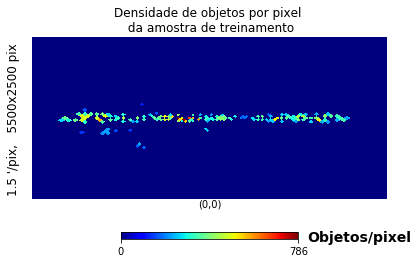

In [111]:
npix_sample_50_training_location = pd.DataFrame()
npix_sample_50_training_location['indices'] = npix_sample_50_training_objects['Npix']
npix_sample_50_training_objects_grouped = npix_sample_50_training_location.groupby(['indices']).size().reset_index(name='counts')

npix_sample_50_training_pixels_frequency = pd.merge(pixels_location, npix_sample_50_training_objects_grouped, how = 'outer')
npix_sample_50_training_pixels_frequency = npix_sample_50_training_pixels_frequency.fillna(0) 

plt.figure(figsize=(10,10))
hp.visufunc.gnomview(map=npix_sample_50_training_pixels_frequency.counts.values,
                     fig=None, 
                     rot=None,
                     coord=None,
                     unit='Objetos/pixel',
                     xsize=5500,
                     ysize=2500,
                     reso=1.5,
                     title='Densidade de objetos por pixel \n da amostra de treinamento',
                     nest=False,
                     remove_dip=False,
                     remove_mono=False,
                     gal_cut=0,
                     min=None,
                     max=None,
                     flip='astro',
                     format='%.3g',
                     cbar=True,
                     cmap='jet',
                     norm=None,
                     hold=False,
                     sub=None,
                     margins=None,
                     notext=False,
                     return_projected_map=False)
plt.savefig('tsne_results/Densidade_Objxpixel_amostra_training')
plt.show()

<Figure size 720x720 with 0 Axes>

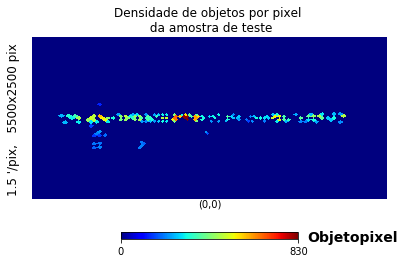

In [112]:
npix_sample_50_testing_objects
npix_sample_50_testing_location = pd.DataFrame()
npix_sample_50_testing_location['indices'] = npix_sample_50_testing_objects['Npix']
npix_sample_50_testing_objects_grouped = npix_sample_50_testing_location.groupby(['indices']).size().reset_index(name='counts')

npix_sample_50_testing_pixels_frequency = pd.merge(pixels_location, npix_sample_50_testing_objects_grouped, how = 'outer')
npix_sample_50_testing_pixels_frequency = npix_sample_50_testing_pixels_frequency.fillna(0) 
plt.figure(figsize=(10,10))
hp.visufunc.gnomview(map=npix_sample_50_testing_pixels_frequency.counts.values,
                     fig=None, 
                     rot=None,
                     coord=None,
                     unit='Objetopixel',
                     xsize=5500,
                     ysize=2500,
                     reso=1.5,
                     title='Densidade de objetos por pixel \n da amostra de teste',
                     nest=False,
                     remove_dip=False,
                     remove_mono=False,
                     gal_cut=0,
                     min=None,
                     max=None,
                     flip='astro',
                     format='%.3g',
                     cbar=True,
                     cmap='jet',
                     norm=None,
                     hold=False,
                     sub=None,
                     margins=False,
                     notext=False,
                     return_projected_map=False)
plt.savefig('tsne_results/Densidade_Objxpixel_amostra_teste')
plt.show()